# Get the data into our notebook

> <font size="5"> 📚 Check out the [Github reference](https://github.com/mrdbourke/tensorflow-deep-learning) of Daniel Bourke </font> 

## IMPORTS

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Download the data with wget

In [2]:
if "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv" in os.listdir():
    print('CSV file already downloaded and accessible in the directory')
else:
    try:
        !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
    except:
        print("command wget not working - Install by 'brew install wget'")

CSV file already downloaded and accessible in the directory


## Import CSV with pandas

In [3]:
# read in data from csv
# fromat dates to datetime and set as index
path = 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'
df = pd.read_csv(path,sep=',',parse_dates=['Date'],index_col = 'Date')

In [4]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


## Plot the data using pandas

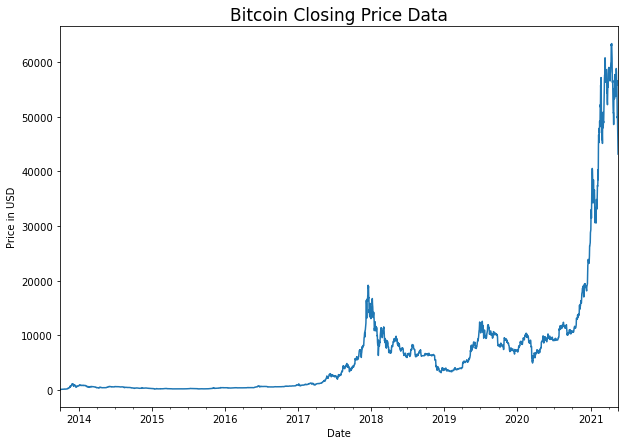

In [7]:
df.iloc[:,1].plot(figsize=(10,7))
plt.title('Bitcoin Closing Price Data',fontsize=17)
plt.ylabel('Price in USD')
plt.show()

> 🔑 **Seasonality**: The seasonality of time series data is how many samples do we have of this data per year. So for our Bitcoin data we have a saisonality of daily or a value of 365.

In [8]:
bitcion_prices = df[['Closing Price (USD)']].rename(columns={'Closing Price (USD)':'Price'})

In [9]:
bitcion_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [10]:
bitcion_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


## Read in the data using pythons csv module

In [11]:
from datetime import datetime

In [12]:
import csv
with open(path, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    next(csvfile) # skip header row
    dates = []
    prices = []
    for row in spamreader:
        dates.append(datetime.strptime(row[1],'%Y-%m-%d'))
        prices.append(float(row[2]))

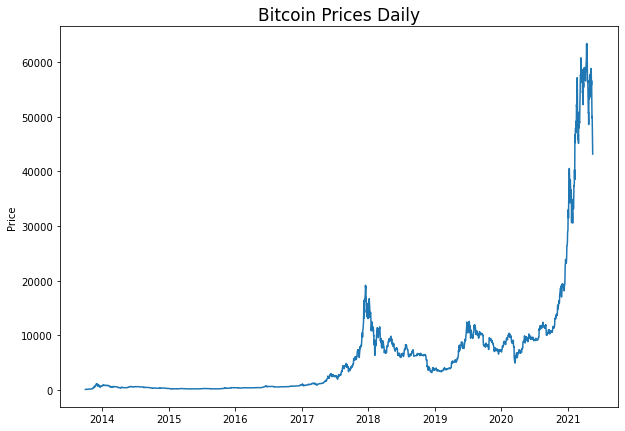

In [13]:
plt.figure(figsize=(10,7))
plt.plot(dates,prices)
plt.ylabel('Price')
plt.title('Bitcoin Prices Daily',fontsize=17)
plt.show()

# Prepare the data

## Create train and test splits

In [14]:
# 80% train and 20% test
split_size = int(len(bitcion_prices)*0.8)

# create train set
X_train,y_train = dates[:split_size], prices[:split_size]

# create test set
X_test, y_test = dates[split_size:], prices[split_size:]

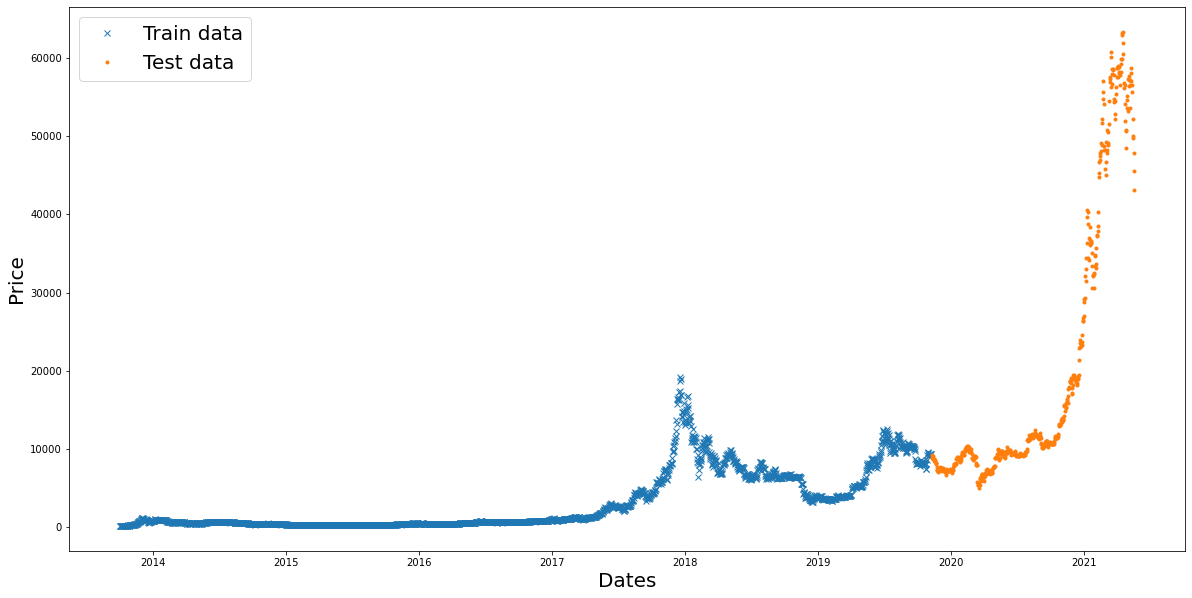

In [15]:
plt.figure(figsize=(20,10))
plt.plot(X_train,y_train,'x')
plt.plot(X_test,y_test,'.')
plt.legend(['Train data','Test data'],fontsize=20)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

### Creating a plotting fuction

In [16]:
import matplotlib.pyplot as plt
# create a function to plot the data
def plot_time_series(timestamp,values,formated='.',start=0,end=None,label=None):
    """
    Plots our timeseries
    """
    plt.plot(timestamp[start:end],values[start:end],formated,label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

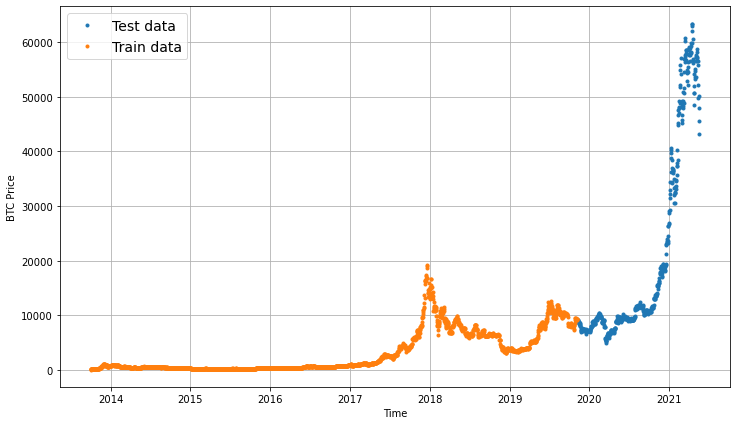

In [17]:
plt.figure(figsize=(12,7))
plot_time_series(X_test,y_test,label='Test data')
plot_time_series(X_train,y_train,label='Train data')

# Model 0 - Naive Time Series Model

Model Formula: $y_{t + 1} = y_t $

In [18]:
# create the Naive baseline forecast
naive_forecast = y_test[:-1]

## Plot the naive forcast against test data

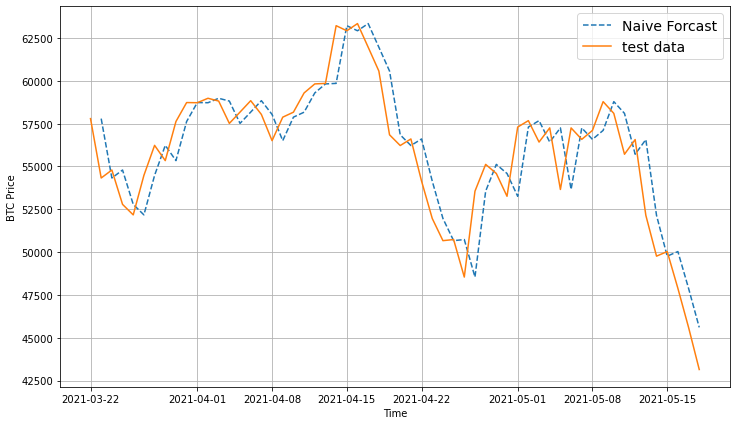

In [19]:
plt.figure(figsize=(12,7))
plot_time_series(X_test[1:],naive_forecast,start=500,end=1000, formated='--',label='Naive Forcast')
plot_time_series(X_test,y_test,start=500, end=1000,formated='-',label='test data')

## Evaluation of our Naive Model



### Implementing the MASE (Mean Absolute Scaled Error)

MASE = $\frac{\frac{1}{J}\sum_j |e_j|}{\frac{1}{T-1}\sum_{t=2}^{T} |Y_t - Y_{t-1}|} $\
where \
$e_j$ ... [__forcast error__](https://en.wikipedia.org/wiki/Forecast_error) (difference between the actual and predicted value) \
$j \in \{1,...,J\}$ with J as the number of forecasts (in our case $J=1$)


In [20]:
def get_mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nom = np.mean(np.abs((y_true-y_pred)))
    denom = np.mean(np.abs((y_true[1:]-y_true[:-1])))
    return nom/denom

In [21]:
mase = get_mase(y_test[1:],naive_forecast)
print('MASE has a value of %.3f'%mase)

MASE has a value of 1.000


In [22]:
# create a function to evaluate our predictions
def evaluate_preds(y_true,y_pred):
    # tensorflow uses datatype float32 by default
    y_true = tf.cast(y_true, dtype = tf.float32)
    y_pred = tf.cast(y_pred, dtype = tf.float32)
    
    # calculate statistics
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
    mase = get_mase(y_true,y_pred)
    
    return({
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': mape.numpy(),
        'mase': mase
    })

In [23]:
len(naive_forecast)

557

In [24]:
len(y_test)

558

In [25]:
naive_results = evaluate_preds(y_test[1:],naive_forecast)
naive_results

Metal device set to: Apple M1 Pro


2022-02-17 19:18:09.881637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-17 19:18:09.881982: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Format data part 2: windowing out dataset

We window our dataset to turn our problem into a supervised learning problem

In [26]:
# Set up some global varibales
HORIZON = 1 # how long we are going to predict into the future
WINDOW_SIZE = 7 # how many past days we use to make the prediction

In [27]:
print(f"We want to use this: {prices[:WINDOW_SIZE]} to predict this: {prices[WINDOW_SIZE]}")

We want to use this: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [28]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
    """
        Function to create labels for windowed dataset. 
    """
    return x[:, :-horizon], x[:,-horizon:]

In [29]:
test_window, test_label =  get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

📚**Ressource**: [Towards Data Science - Fast and Robust Sliding Window Vectorization with NumPy](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5)

In [30]:
import numpy as np

In [31]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    '''
        Function that turns a 1D array to 2D array of sequential labelled windows of window_size and horizon size labels
    '''
    
    # 1. Create a window of window_size
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    
    # 2. Use numpy indexing to create 2D array of multiple windows 
    windows_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    
    # 3. Indexing on the target array
    windowed_array = x[windows_indexes]#
    
    # get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    
    return(windows, labels)

In [32]:
full_windows, full_labels = make_windows(np.array(prices))

In [33]:
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning our windows into train and test sets

In [34]:
def make_train_test_splits(windows, labels, test_split=0.2):
    """
        Function that splits matching pairs of windows and labels into train and test splits
    """
    split_size = int(len(windows) * (1 - test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

In [36]:
# check if our training labels are equal to before
np.array_equal(np.squeeze(train_labels)[:-HORIZON-1],y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [37]:
import os

In [38]:
def create_model_checkpoint(model_name, save_path = "model_experiments", verbose=0, sbo=True):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              monitor='val_loss',
                                             verbose=verbose,
                                             save_best_only = sbo)

# Model 1 - Dense Model (window size = 7, horizon = 1)

## Using functional API

In [39]:
from tensorflow.keras import layers

# define the input shape
input_shape = (7,)
# define input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# define middle dense layer
dense = layers.Dense(128, activation='relu', name='dense_layer')(inputs)

# define output layer
outputs = layers.Dense(1, name='output_layer')(dense)

model_1 = tf.keras.Model(inputs, outputs,name='model_1_dense')

## Using Sequential API

In [40]:
# 1. create the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

# 2. compile the model
model_1.compile(
    loss = 'mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae','mse']
)

# 3. fit the model
model_1.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows,test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

2022-02-17 19:18:10.068405: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-02-17 19:18:10.207733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 861.6518 - mae: 861.6518 - mse: 2851844.0000  

2022-02-17 19:18:10.470732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-17 19:18:10.589429: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
18/18 [==============================] - 1s 25ms/step - loss: 861.6518 - mae: 861.6518 - mse: 2851844.0000 - val_loss: 3166.5315 - val_mae: 3166.5315 - val_mse: 24633926.0000
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 376.5994 - mae: 376.5994 - mse: 575694.8125 - val_loss: 1856.6790 - val_mae: 1856.6790 - val_mse: 9355666.0000
Epoch 3/100
18/18 [==============================] - 0s 16ms/step - loss: 276.0797 - mae: 276.0797 - mse: 361384.2500 - val_loss: 1643.6747 - val_mae: 1643.6747 - val_mse: 7801215.5000
Epoch 4/100
18/18 [==============================] - 0s 16ms/step - loss: 259.8691 - mae: 259.8691 - mse: 338072.4062 - val_loss: 1480.3108 - val_mae: 1480.3108 - val_mse: 6707462.5000
Epoch 5/100
18/18 [==============================] - 0s 15ms/step - loss: 253.5329 - mae: 253.5329 - mse: 326412.3438 - val_loss: 1399.6560 - val_mae: 1399.6560 - val_mse: 6174333.5000
Epoch 6/100

In [41]:
# load in the saved best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")

In [42]:
# evaluate the model
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 598.8594 - mae: 598.8594 - mse: 1247263.6250


2022-02-17 19:18:28.568687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[598.859375, 598.859375, 1247263.625]

In [43]:
model_1_preds = model_1.predict(test_windows)

2022-02-17 19:18:28.710603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [44]:
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [45]:
# let's write a function to make forcasts for any kind of model
def make_preds(model, X_test, y_test):
    """
        Function that takes in a trained model, makes predictions on X_test and computes evaluation metrics with comparison betwenn y_test and the predictions.
    """
    y_pred = model.predict(X_test)
    
    return evaluate_preds(y_test.reshape(-1,),y_pred.reshape(-1,))

In [46]:
model_1_results = make_preds(model_1, test_windows, test_labels)
model_1_results

{'mae': 598.8594,
 'mse': 1247263.6,
 'rmse': 1116.8096,
 'mape': 2.6998978,
 'mase': 1.05203}

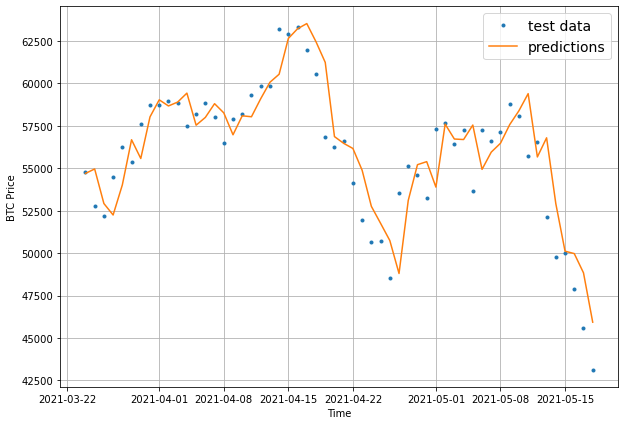

In [47]:
# Lets plot our model 1 predictions

offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_1_preds[:,0],
    formated='-',
    start=offset,
    label="predictions"          
)

# Model 2 - Dense (window = 30, horizon = 1)

In [48]:
HORIZON = 1
WINDOW_SIZE = 30

In [49]:
full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon = HORIZON)

In [50]:
len(full_windows), len(full_labels)

(2757, 2757)

In [51]:
# create train and test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,full_labels)

In [52]:
# take a look a the data 
print(f"Window: {train_windows[0]} -> Labels: {train_labels[0]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
 133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
 177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
 192.75666 197.4    ] -> Labels: [196.02499]


In [53]:
# 1. create model 2
model_2 = tf.keras.Sequential(name='model_2_dense')
model_2.add(layers.Dense(128,activation='relu'))
model_2.add(layers.Dense(1,activation='linear'))

# 2. compile the model
model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae','mse']
)

# 3. fit the model
model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows,test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 1205.7825 - mae: 1205.7825 - mse: 5618644.0000 

2022-02-17 19:18:29.024838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-17 19:18:29.222335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
18/18 [==============================] - 1s 24ms/step - loss: 1060.3167 - mae: 1060.3167 - mse: 4550409.0000 - val_loss: 4333.2817 - val_mae: 4333.2817 - val_mse: 43557948.0000
Epoch 2/100
18/18 [==============================] - 0s 16ms/step - loss: 551.2116 - mae: 551.2116 - mse: 1388317.5000 - val_loss: 2122.1768 - val_mae: 2122.1768 - val_mse: 12260479.0000
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 441.6427 - mae: 441.6427 - mse: 897553.7500 - val_loss: 2408.8179 - val_mae: 2408.8179 - val_mse: 14292509.0000
Epoch 4/100
18/18 [==============================] - 0s 15ms/step - loss: 297.5637 - mae: 297.5637 - mse: 456774.6875 - val_loss: 1463.9254 - val_mae: 1463.9254 - val_mse: 6613638.0000
Epoch 5/100
18/18 [==============================] - 0s 16ms/step - loss: 242.2207 - mae: 242.2207 - mse: 321415.7188 - val_loss: 1403.9991 - val_mae: 1403.9991 - val_mse: 6168326.5000
Epoch 6

In [54]:
# evaluate model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 638.0350 - mae: 638.0350 - mse: 1345354.5000


[638.0350341796875, 638.0350341796875, 1345354.5]

In [55]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")

In [56]:
# evaluate best performing model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 625.6342 - mae: 625.6342 - mse: 1314843.8750


2022-02-17 19:18:46.111985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[625.6342163085938, 625.6342163085938, 1314843.875]

In [57]:
model_2_preds = model_2.predict(test_windows)

2022-02-17 19:18:46.238033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [58]:
model_2_results = make_preds(model_2,test_windows, test_labels)

In [59]:
model_2_results

{'mae': 625.63416,
 'mse': 1314843.9,
 'rmse': 1146.6665,
 'mape': 2.9044948,
 'mase': 1.0936146}

In [60]:
model_1_results

{'mae': 598.8594,
 'mse': 1247263.6,
 'rmse': 1116.8096,
 'mape': 2.6998978,
 'mase': 1.05203}

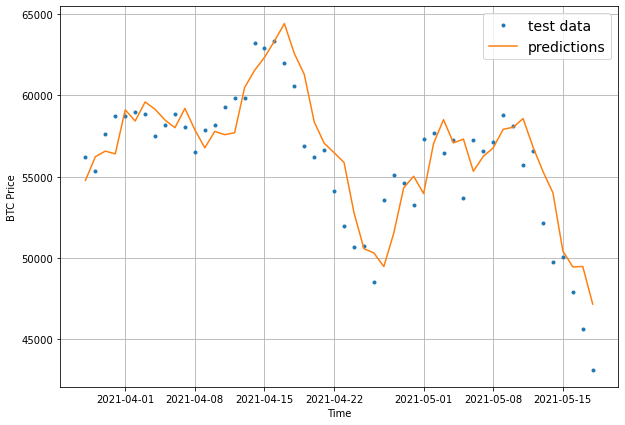

In [61]:
# Lets plot our model 1 predictions

offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_2_preds[:,0],
    formated='-',
    start=offset,
    label="predictions"          
)

# Model 3 - Dense Model (window = 30, horizon = 7)

In [62]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(np.array(prices), window_size=WINDOW_SIZE, horizon=HORIZON)

In [63]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [64]:
# 1. Create the model
model_3 = tf.keras.Sequential(name='model_3_dense')
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(HORIZON))

# 2. Compile the model
model_3.compile(
    loss='MAE',
    optimizer=tf.keras.optimizers.Adam()
)

# 3. Fit the Model
model_3.fit(
    train_windows, 
    train_labels, 
    epochs=100,
    batch_size = 128, 
    validation_data = (test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name = model_3.name)]
)

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2396.8140

2022-02-17 19:18:46.546584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-17 19:18:46.728137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
18/18 [==============================] - 0s 17ms/step - loss: 1892.3514 - val_loss: 2601.9573
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 538.1998 - val_loss: 2545.0361
Epoch 3/100
18/18 [==============================] - 0s 13ms/step - loss: 395.8932 - val_loss: 2013.9905
Epoch 4/100
18/18 [==============================] - 0s 14ms/step - loss: 363.8992 - val_loss: 1844.5144
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 343.0416 - val_loss: 1738.8759
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 330.5297 - val_loss: 1880.3016
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - loss: 327.8354 - val_loss: 1663.7164
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 308.3817 - val_loss: 1592.8840
Epoch 9/100
18/18 [==============================] - 0s 13ms/step - loss: 298.0944 - val_loss: 158

In [65]:
# Evaluate the model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1348.5984


1348.598388671875

In [66]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense')

In [67]:
model_3_preds = model_3.predict(test_windows)

2022-02-17 19:18:59.836171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [68]:
model_3_preds.shape

(551, 7)

In [69]:
model_2_preds.shape

(552, 1)

In [70]:
model_3_results = make_preds(model_3,test_windows, test_labels)

In [71]:
model_3_results

{'mae': 1250.9192,
 'mse': 5479910.5,
 'rmse': 2340.921,
 'mape': 5.6312857,
 'mase': 1.8225003}

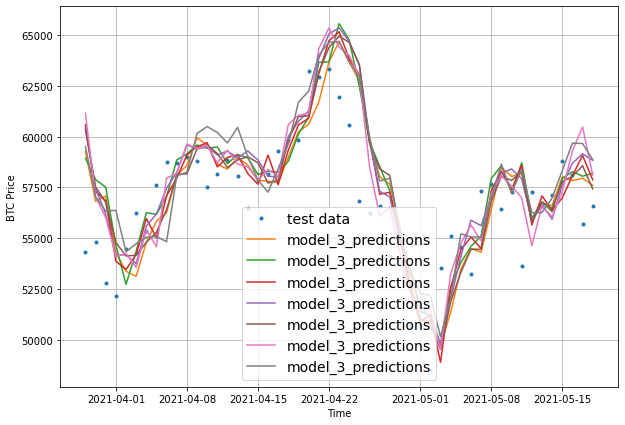

In [72]:
offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_3_preds,
    formated='-',
    start=offset,
    label="model_3_predictions"          
)

In [74]:
model_3_preds[0]

array([9416.098, 9544.769, 9561.477, 9554.205, 9571.748, 9762.358,
       9643.232], dtype=float32)

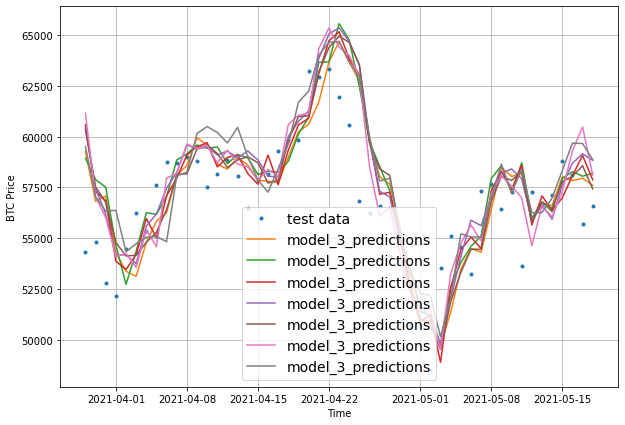

In [75]:
offset = 500
plt.figure(figsize=(10,7))

plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=test_labels[:,0],
    start=offset,
    label="test data"
                
)
plot_time_series(
    timestamp=X_test[-len(test_windows):],
    values=model_3_preds,
    formated='-',
    start=offset,
    label="model_3_predictions"          
)

# Comparing our models trained so far

In [76]:
naive_results

{'mae': 567.9803,
 'mse': 1147547.1,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [77]:
df_results = pd.DataFrame(
    {
        "Naive Model": naive_results,
        "Model 1": model_1_results,
        "Model 2": model_2_results,
        "Model 3": model_3_results
    }
)

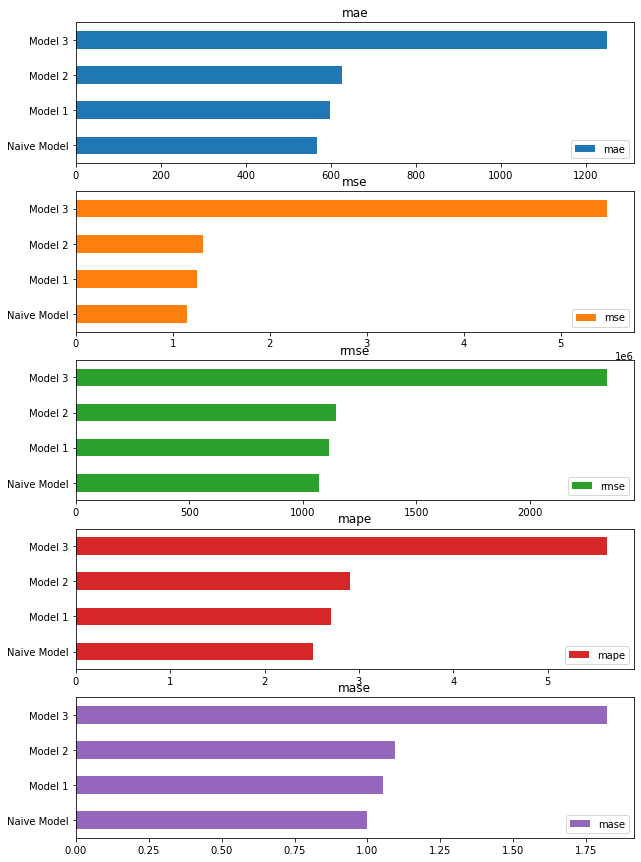

In [78]:
df_results.T.plot(kind='barh',subplots=True, figsize=(10,15),sharex=False)
plt.show()

# Model 4 - Conv1D

In [81]:
HORIZON = 1
WINDOW_SIZE = 7

In [83]:
# Create windowed dataset
full_windows, full_labels = make_windows(np.array(prices), WINDOW_SIZE, HORIZON)

In [84]:
len(full_windows), len(full_labels)

(2780, 2780)

In [85]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

## Preparing our data to be in the right input shape

In [86]:
train_windows[0].shape

(7,)

In [87]:
# Before we pass our data to the conv1d layer to reshape it in order to make everything work
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [89]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x,axis=1)) # add an extra dimension for x

In [94]:
expand_dims_layer(x).shape, expand_dims_layer(x).ndim

(TensorShape([7, 1]), 2)

In [98]:
# we could to the same just using numpy 
np.array(x).reshape(-1,), np.array(x).reshape(-1,1)

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ]),
 array([[123.65499],
        [125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ]]))

## Building model 4

In [103]:
# 1. Build the model
model_4 = tf.keras.Sequential(name='model_4')
model_4.add(layers.Lambda(lambda x: tf.expand_dims(x,axis=1)))
model_4.add(layers.Conv1D(filters=128,kernel_size=7,padding='causal',activation='relu'))
model_4.add(layers.Dense(HORIZON))

# 2. Compile the model
model_4.compile(
    loss=['MAE'],
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['MAE','MSE']
)

# 3. Fit the model
model_4.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]

)

Epoch 1/100


2022-02-17 19:41:09.828320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/18 [=========================>....] - ETA: 0s - loss: 2732.4631 - MAE: 2732.4631 - MSE: 19030690.0000

2022-02-17 19:41:10.958460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: model_experiments/model_4/assets
18/18 [==============================] - 2s 32ms/step - loss: 2637.8777 - MAE: 2637.8777 - MSE: 17967156.0000 - val_loss: 8624.5547 - val_MAE: 8624.5547 - val_MSE: 132672520.0000
Epoch 2/100
18/18 [==============================] - 0s 21ms/step - loss: 576.2357 - MAE: 576.2357 - MSE: 1278232.1250 - val_loss: 2219.3625 - val_MAE: 2219.3625 - val_MSE: 12396095.0000
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 263.0898 - MAE: 263.0898 - MSE: 301508.9688 - val_loss: 1335.6047 - val_MAE: 1335.6046 - val_MSE: 4786602.0000
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 201.8972 - MAE: 201.8972 - MSE: 205399.3906 - val_loss: 1179.4011 - val_MAE: 1179.4011 - val_MSE: 4060816.7500
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 189.0146 - MAE: 189.0146 - MSE: 189521.0781 - val_loss: 1048.8179 - val_MAE: 1048.8179 - val_MSE: 3623013.0000
Epoch 6/100

In [104]:
# print the summary
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            6400      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [105]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Evaluate the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 613.4544 - MAE: 613.4544 - MSE: 1266985.2500


[613.4544067382812, 613.4544067382812, 1266985.25]

In [107]:
model_4 = tf.keras.models.load_model('model_experiments/model_4')

In [108]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 577.9492 - MAE: 577.9492 - MSE: 1201465.0000


2022-02-17 19:44:23.804282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[577.9491577148438, 577.9491577148438, 1201465.0]

In [110]:
# make predictions first
model_4_preds = model_4.predict(test_windows)
model_

2022-02-17 19:45:30.625032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [111]:
model_4_results = make_preds(model_4, test_windows, test_labels)
model_4_results

{'mae': 577.9491,
 'mse': 1201465.0,
 'rmse': 1096.1136,
 'mape': 2.5963554,
 'mase': 1.0152965}

In [112]:
model_1_results

{'mae': 598.8594,
 'mse': 1247263.6,
 'rmse': 1116.8096,
 'mape': 2.6998978,
 'mase': 1.05203}